# Detect flower species using support vector machines (SVM) in Python
------------
This work is part of a collection of practice sets called [Machine Learning Starter](https://github.com/jamiemorales/project-machine-learning-starter).
It aims to help someone get started fast and gain a high-level understanding of the fundamental steps in the machine learning lifecycle early on.
After completion, someone will have built intuition over the machine learning lifecycle. 

## Step 0: Understand the problem
What we're trying to do here is to classify species of Iris flowers.

## Step 1: Set-up and understand data
This step helps uncover issues that we will want to address in the next step and take into account when building and evaluating our model. We also want to find interesting relationships or patterns that we can possibly leverage in solving the problem we specified.

In [1]:
# Set-up libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from mpl_toolkits import mplot3d
from sklearn.metrics import classification_report

In [2]:
# Read-in data
df = pd.read_csv('../00-Datasets/iris.csv')

In [57]:
# Check some details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [58]:
# Check some records
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [59]:
# Check for missing values
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [60]:
# Check for duplicate values
df.duplicated().sum()

0

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

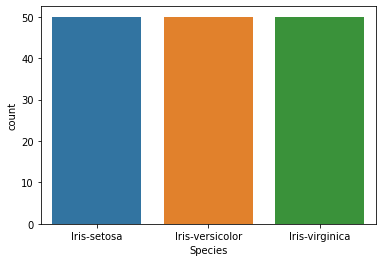

In [61]:
# Check breakdown of label
sns.countplot(df.Species)
df.Species.value_counts()

In [62]:
# Summarise
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Step 2: Preprocess data and understand some more
This step typically takes the most time in the cycle but for our purposes, most of the datasets chosen in this series are clean.

Real-world datasets are noisy and incomplete. The choices we make in this step to address data issues can impact downstream steps and the result itself. For example, it can be tricky to address missing data when we don't know why it's missing. Is it missing completely at random or not? It can also be tricky to address outliers if we do not understand the domain and problem context enough.

Let's work on the first two features. Keeping things simple for now helps avoid ugly slicing with a two dimensional dataset.

In [63]:
# Grab subset of data
df = df[['SepalLengthCm', 'SepalWidthCm', 'Species']]

In [64]:
# Split dataset into 80% train and 20% validation
X = df.drop('Species', axis=1)
y = df['Species']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

## Step 3: Model and evaluate
This last step is three-fold.

We create the model(s) and fit the model to the data we prepared for training.

We then proceed to classifying with the data we prepared for validation.

Lastly, we evaluate the model's performance with mainstream classification metrics.

In [65]:
# Build and train the model(s)
C = 1.0
model_svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)
model_svc_rbf = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_train, y_train)
model_svc_pol = svm.SVC(kernel='poly', degree=3, C=C).fit(X_train, y_train)
model_svc_lin = svm.LinearSVC(C=C).fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [66]:
# Apply model(s) to validation data
y_predict_svc = model_svc.predict(X_val)
y_predict_svc_rbf = model_svc_rbf.predict(X_val)
y_predict_svc_pol = model_svc_pol.predict(X_val)
y_predict_svc_lin = model_svc_lin.predict(X_val)

In [67]:
# Compare actual and predicted values
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

predictions = [y_predict_svc,
               y_predict_svc_rbf,
               y_predict_svc_pol,
               y_predict_svc_lin]

for pred in predictions:
    actual_vs_predict = pd.DataFrame({'Model': get_df_name(pred),
                                      'Actual': y_val,
                                      'Predict': pred
                                    })
    print(actual_vs_predict.sample(5))

             Model           Actual          Predict
78   y_predict_svc  Iris-versicolor  Iris-versicolor
93   y_predict_svc  Iris-versicolor  Iris-versicolor
33   y_predict_svc      Iris-setosa      Iris-setosa
134  y_predict_svc   Iris-virginica  Iris-versicolor
22   y_predict_svc      Iris-setosa      Iris-setosa
                 Model           Actual          Predict
16   y_predict_svc_rbf      Iris-setosa      Iris-setosa
62   y_predict_svc_rbf  Iris-versicolor  Iris-versicolor
40   y_predict_svc_rbf      Iris-setosa      Iris-setosa
97   y_predict_svc_rbf  Iris-versicolor   Iris-virginica
107  y_predict_svc_rbf   Iris-virginica   Iris-virginica
                 Model           Actual          Predict
62   y_predict_svc_pol  Iris-versicolor  Iris-versicolor
73   y_predict_svc_pol  Iris-versicolor  Iris-versicolor
71   y_predict_svc_pol  Iris-versicolor  Iris-versicolor
26   y_predict_svc_pol      Iris-setosa      Iris-setosa
100  y_predict_svc_pol   Iris-virginica   Iris-virginic

In [68]:
# Evalute models
print('SVC with linear kernel: \n', classification_report(y_val, y_predict_svc))
print('Linear SVC with linear kernel: \n', classification_report(y_val, y_predict_svc_lin))
print('SVC rbf kernel: \n', classification_report(y_val, y_predict_svc_rbf))
print('SVC with polynomial kernel: \n', classification_report(y_val, y_predict_svc_pol))

SVC with linear kernel: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.73      0.62      0.67        13
 Iris-virginica       0.38      0.50      0.43         6

       accuracy                           0.73        30
      macro avg       0.70      0.71      0.70        30
   weighted avg       0.76      0.73      0.74        30

Linear SVC with linear kernel: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.67      0.31      0.42        13
 Iris-virginica       0.31      0.67      0.42         6

       accuracy                           0.63        30
      macro avg       0.66      0.66      0.61        30
   weighted avg       0.72      0.63      0.63        30

SVC rbf kernel: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris

## More

If you found this work interesting, you might like:

* Machine Learning Starter

* Deep Learning Starter

* Natural Language Processing Starter

You can find more at [github.com/jamiemorales](https://github.com/jamiemorales).

Datasets are not mine. List of sources: [datasets and sources](https://github.com/jamiemorales/project-machine-learning-starter/blob/master/00-Datasets/Data%20sources.txt)

For sharing this work, here's how / the license: https://creativecommons.org/licenses/by-sa/4.0/